# **Crear modelo de clasificación de recetas (Desayuno, Almuerzo o Postre)**

In [234]:
#importar librerías

#librerías para el procesamiento y el análisis de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#paquetes para el procesamiento de datos
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

#paquetes para entrenar modelos de clasificación
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#paquetes para buscar el mejor modelo
from sklearn.model_selection import GridSearchCV

#paquetes para evaluar los modelos
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score

#cargar el mlb_ml que se usó para pasar los ingredientes a columnas 
import joblib
mlb = joblib.load("../../limpieza/mlb_ml.pkl")


## **Extraer datos**

In [235]:
df = pd.read_csv('../../limpieza/recetas_ML.csv')
df.head()

,Aceite,Aceite de oliva,Aceitunas,Aderezo,Agua,Ajo,Albahaca,Albondigas,Algas,Almendras,...,Vainillas,Verduras,Vino blanco,Vino tinto,Yogur,Zanahoria,Zapallitos,Zapallo,Nombre,Categoria
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Tostadas con mermelada,Desayuno
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Facturas de hojaldre,Desayuno
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Tortilla de papas,Almuerzo
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Milanesa napolitana,Almuerzo
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Empanadas de carne,Almuerzo


## **Explorar los datos**

In [236]:
#tamaño de dataset
df.shape

(232, 131)

In [237]:
#ver la cantidad de cada valor posible de la variable target('Categoria')
df['Categoria'].value_counts()

Categoria
Almuerzo    165
Postre       51
Desayuno     16
Name: count, dtype: int64

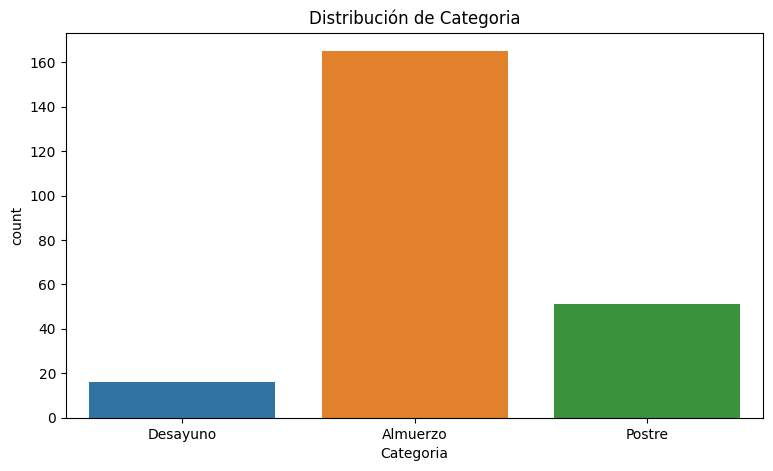

In [238]:
#graficar la cantidad de veces que se repitió cada valor en la variable target(Categoria)
fig = plt.figure(figsize=(9,5))
ax = fig.add_subplot()

sns.countplot(data=df, x='Categoria', hue='Categoria')
plt.title('Distribución de Categoria')
plt.show()

## **Procesar los datos**

### Balancear los datos
Para tener buenos resultados en el entrenamiento del modelo es necesario balancear los datos para que no haya un sobreajuste y no haga predicciones erróneas. Para ello se va a hacer un sobreajuste con el método SMOTE de la librería imblearn.

In [239]:
#copia del dataset original
df2 = df.copy()

In [240]:
#crear las variables x(features) e y(target)
x = df2.drop(['Nombre','Categoria'], axis= 1)
y = df2['Categoria'].values

In [241]:
#distribución que quiero
cantidad = {'Desayuno':150, 'Almuerzo':165, 'Postre':150} 

#balancear los datos con el método SMOTE de imblearn pasandole las variables x e y
x_balanced, y_balanced = SMOTE(sampling_strategy= cantidad,random_state=42).fit_resample(x,y)

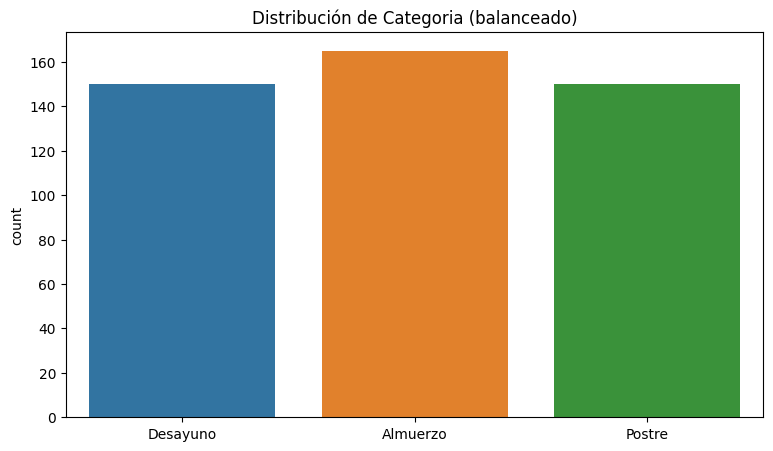

In [242]:
#gráficar la variable 'categoria' ya balanceada
fig =plt.figure(figsize=(9,5))
ax= fig.add_subplot()

sns.countplot(x=y_balanced, hue=y_balanced)
plt.title('Distribución de Categoria (balanceado)')
plt.show()

### Escalar los datos
Ya balanceado el dataset, se procede a escalar los features con StandarScaler

In [243]:
x_balanced.head()

,Aceite,Aceite de oliva,Aceitunas,Aderezo,Agua,Ajo,Albahaca,Albondigas,Algas,Almendras,...,Tofu,Tomate,Vainillas,Verduras,Vino blanco,Vino tinto,Yogur,Zanahoria,Zapallitos,Zapallo
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [244]:
x_balanced.shape

(465, 129)

In [245]:
#escalar los datos con StandarScaler
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x_balanced)
x_scaler

array([[-0.11433239, -0.04642383, -0.04642383, ..., -0.11433239,
        -0.04642383, -0.04642383],
       [-0.11433239, -0.04642383, -0.04642383, ..., -0.11433239,
        -0.04642383, -0.04642383],
       [-0.11433239, -0.04642383, -0.04642383, ..., -0.11433239,
        -0.04642383, -0.04642383],
       ...,
       [-0.11433239, -0.04642383, -0.04642383, ..., -0.11433239,
        -0.04642383, -0.04642383],
       [-0.11433239, -0.04642383, -0.04642383, ..., -0.11433239,
        -0.04642383, -0.04642383],
       [-0.11433239, -0.04642383, -0.04642383, ..., -0.11433239,
        -0.04642383, -0.04642383]])

## **Entrenar modelos**

### Separar los datos en entrenamiento y testeo

In [246]:
#separar los datos de testeo y entrenamineto
x_train, x_test, y_train, y_test = train_test_split(x_scaler, y_balanced, test_size=0.3, random_state=42)

### KNeighborsClassifier

In [247]:
#entrenar modelo
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

#predecir los datos de testeo
y_hat_knn = knn.predict(x_test)

### DecisionTreeClassifier

In [248]:
#entrenar modelo
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=5)
dtc = dtc.fit(x_train, y_train)

#predecir los datos de testeo
y_hat_dtc = dtc.predict(x_test)

### RandomForestClassifier

In [249]:
#entrenar modelo
rfc = RandomForestClassifier(n_estimators=5, criterion='entropy', max_depth=5, random_state=0)
rfc = rfc.fit(x_train, y_train)

#predecir los datos de testeo
y_hat_rfc = rfc.predict(x_test)

## **Validar modelos**

In [250]:
#hacer función para validar los modelos usando el método classification_report
def validation(name, y_test, y_hat, grid = 0):
    #nombre del modelo que se va a validar
    print(f"\n{name.upper()}:")    
    
    #en caso que el parámetro grid sea diferente de 0 mostrar los mejores 
    # hiperparámetros del mejor modelo encontrado 
    if grid != 0:
        print(f'\nMejores parametros:\n{grid.best_params_}\n')
   
   #mostrar los resultados de la validación     
    print(f"Metricas:\n{classification_report(y_test, y_hat)}\n")

In [251]:
validation('KNeighborsClassifier', y_test, y_hat_knn)
validation('DecisionTreeClassifier', y_test, y_hat_dtc)
validation('RandomForestClassifier', y_test, y_hat_rfc)


KNEIGHBORSCLASSIFIER:
Metricas:
              precision    recall  f1-score   support

    Almuerzo       0.90      0.68      0.77        53
    Desayuno       0.67      0.95      0.78        40
      Postre       1.00      0.91      0.96        47

    accuracy                           0.84       140
   macro avg       0.86      0.85      0.84       140
weighted avg       0.87      0.84      0.84       140



DECISIONTREECLASSIFIER:
Metricas:
              precision    recall  f1-score   support

    Almuerzo       0.61      0.98      0.75        53
    Desayuno       0.92      0.28      0.42        40
      Postre       1.00      0.91      0.96        47

    accuracy                           0.76       140
   macro avg       0.84      0.72      0.71       140
weighted avg       0.83      0.76      0.73       140



RANDOMFORESTCLASSIFIER:
Metricas:
              precision    recall  f1-score   support

    Almuerzo       0.97      0.72      0.83        53
    Desayuno       0.58 

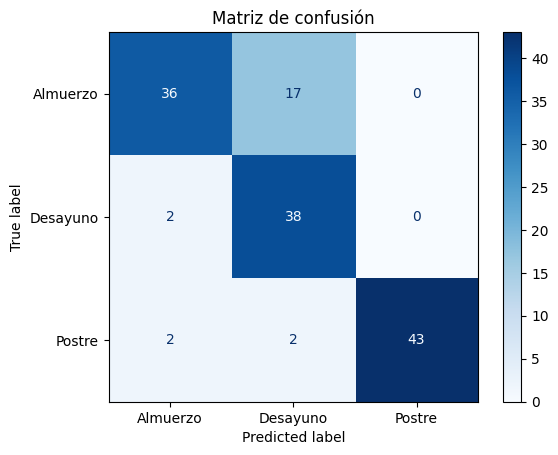

In [252]:
#graficar la matriz de confusión del mejor modelo
cm = confusion_matrix(y_test, y_hat_knn)

cmd = ConfusionMatrixDisplay(cm, display_labels=knn.classes_)
cmd.plot(cmap=plt.cm.Blues)

plt.title('Matriz de confusión')
plt.show()

## **Optimizar modelos**

Para optimizar los modelos se usa el método GridSearchCV de scikit-learn

### KNeighborsClassifier

In [253]:
#hiperparámetros para probar diferentes variantes
parameters_knn= {"n_neighbors":[2,4,5,7,8,10]}

#buscar el mejor modelo teniendo en cuenta el accuracy
knn = KNeighborsClassifier()
grid_knn = GridSearchCV(knn, parameters_knn, scoring = 'accuracy',cv=25)

#entrenar el modelo
grid_knn.fit(x_train, y_train)

#predecir los datos de testeo
y_hat_grid_knn = grid_knn.predict(x_test)

### DecisionTreeClassifier

In [254]:
#hiperparámetros para probar diferentes variantes
parameters_dtc = {"criterion":["gini", "entropy"],
                  "max_depth": [4,5,8,10,12,15]}

#buscar el mejor modelo teniendo en cuenta el accuracy
dtc = DecisionTreeClassifier()
grid_dtc= GridSearchCV(dtc, parameters_dtc, scoring='accuracy',cv=25)

#entrenar el modelo
grid_dtc.fit(x_train, y_train)

#predecir los datos de testeo
y_hat_grid_dtc = grid_dtc.predict(x_test)

### RandomForestClassifier

In [255]:
#hiperparámetros para probar diferentes variantes
parameters_rfc = {"criterion":["gini", "entropy"],
                  "n_estimators": [4,5,8,10,12,15],
                  "max_depth": [4,5,8,10,12,15,20]}

#buscar el mejor modelo teniendo en cuenta el accuracy
rfc = RandomForestClassifier()
grid_rfc= GridSearchCV(rfc, parameters_rfc, scoring='accuracy',cv=25)

#entrenar el modelo
grid_rfc.fit(x_train, y_train)

#predecir los datos de testeo
y_hat_grid_rfc = grid_rfc.predict(x_test)

## **Validar modelos optimizados**

In [256]:
validation('KNeighborsClassifier_grid', y_test, y_hat_grid_knn, grid=grid_knn)
validation('DecisionTreeClassifier_grid', y_test, y_hat_grid_dtc, grid=grid_dtc)
validation('RandomForestClassifier_grid', y_test, y_hat_grid_rfc, grid=grid_rfc)


KNEIGHBORSCLASSIFIER_GRID:

Mejores parametros:
{'n_neighbors': 2}

Metricas:
              precision    recall  f1-score   support

    Almuerzo       0.92      0.83      0.87        53
    Desayuno       0.78      0.95      0.85        40
      Postre       1.00      0.91      0.96        47

    accuracy                           0.89       140
   macro avg       0.90      0.90      0.89       140
weighted avg       0.90      0.89      0.89       140



DECISIONTREECLASSIFIER_GRID:

Mejores parametros:
{'criterion': 'entropy', 'max_depth': 15}

Metricas:
              precision    recall  f1-score   support

    Almuerzo       0.96      0.81      0.88        53
    Desayuno       0.76      0.93      0.83        40
      Postre       0.98      0.96      0.97        47

    accuracy                           0.89       140
   macro avg       0.90      0.90      0.89       140
weighted avg       0.91      0.89      0.89       140



RANDOMFORESTCLASSIFIER_GRID:

Mejores parametros:
{'

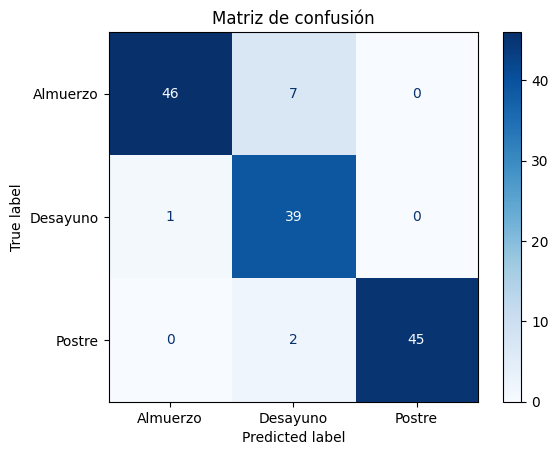

In [257]:
#graficar la matriz de confusión del mejor modelo
cm = confusion_matrix(y_test, y_hat_grid_rfc)

cmd = ConfusionMatrixDisplay(cm, display_labels=grid_rfc.classes_)
cmd.plot(cmap=plt.cm.Blues)

plt.title('Matriz de confusión')
plt.show()

In [258]:
#ver el resultado del promedio de la validación cruzada en el mejor modelo
print('Resultado de validación cruzada:', cross_val_score(grid_rfc, x_scaler, y_balanced, cv=5).mean())

Resultado de validación cruzada: 0.9290322580645161


## **Probar el mejor modelo**

In [259]:
#crear función para probar el modelo
def clasificar_receta(ingredientes_usuario, model, mlb, scaler):
    ingredientes= ingredientes_usuario.split(',')
    #pasar los ingredientes ingresados a one-hot-encoding con el transformador mlb
    ingredientes_mlb = pd.DataFrame(mlb.transform([ingredientes]), columns=mlb.classes_)
    #escalar los ingredientes
    ingredientes_scaler = scaler.transform(ingredientes_mlb)
    #predecir el tipo de receta
    predict_model = model.predict(ingredientes_scaler)
    #se imprime por pantalla
    print(f"Ingredientes: {ingredientes_usuario.replace(',','-')}. Clasificación: {predict_model[0]}")

In [260]:
ingredientes_usuario = "Manzanas,Azucar"
#obtener la clasificación del la receta
clasificar_receta("Manzanas,Azucar", grid_rfc, mlb, scaler)

Ingredientes: Manzanas-Azucar. Clasificación: Postre


In [261]:
ingredientes_usuario = 'Harina,Manteca,Azucar'
#obtener la clasificación del la receta
clasificar_receta(ingredientes_usuario, grid_rfc, mlb, scaler)

Ingredientes: Harina-Manteca-Azucar. Clasificación: Desayuno


In [262]:
ingredientes_usuario = 'Tomate,Carne picada,Cebolla'
#obtener la clasificación del la receta
clasificar_receta(ingredientes_usuario, grid_rfc, mlb, scaler)

Ingredientes: Tomate-Carne picada-Cebolla. Clasificación: Almuerzo


## **Guardar el mejor modelo**

In [264]:
#guardar el mejor modelo entrenado
joblib.dump(grid_rfc, 'clasificar_receta.pkl')

#guardar scalar ya entrenado para luego usarlo
joblib.dump(scaler, 'scaler_clasificar.pkl')

['scaler_clasificar.pkl']